# HW3 : Logistic Regression and Neural Networks

### Instructions

The authoritative HW3 instructions are on the course website:

http://www.cs.tufts.edu/cs/135/2025s/hw3.html

Please report any questions to Piazza.

### Outline of this Notebook



In [23]:
import os
import numpy as np
import pandas as pd
import time
import warnings

In [24]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.0, style='whitegrid')

Allow autoreload of student-edited code to be reflected in this notebook

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import LRGradientDescent 

insert_final_col_of_all_ones = LRGradientDescent.insert_final_col_of_all_ones
LogisticRegressionGradientDescent = LRGradientDescent.LogisticRegressionGradientDescent

# Create toy dataset with F=1 input dimension

Each input $x_n$ is one position on number line

Each label $y_n$ is binary, either 0 or 1

In [27]:
# Toy problem 
# Logistic regression should be able to perfectly predict all 10 examples
N = 10
xoffset = 1.23
x_NF = xoffset + np.hstack([
    np.linspace(-2, -1, 5), np.linspace(1, 2, 5)])[:,np.newaxis]
y_N = np.hstack([np.zeros(5), np.ones(5)])


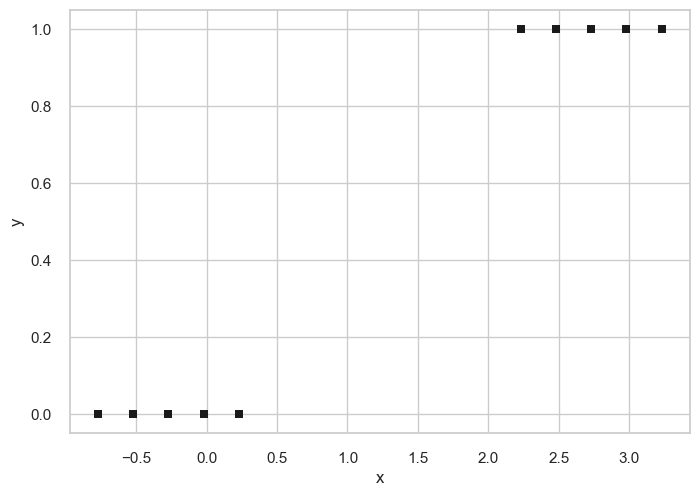

In [28]:
plt.plot(x_NF[:,0], y_N, 'ks');
plt.xlabel('x');
plt.ylabel('y');

## Setup 

In [29]:
fixedb = -1.0 # Fix bias coef at -1 for now, we'll learn it later in 1B

xone_NG = insert_final_col_of_all_ones(x_NF)

## Debugging Figure: Show phat as function of x for different w

You don't need this for your report, but this is for your *understanding* to make sure your predict_proba is correct

No need to edit here. Read thru to understand this code and what it's doing. 
Then use it to help debug your `predict_proba` implementation

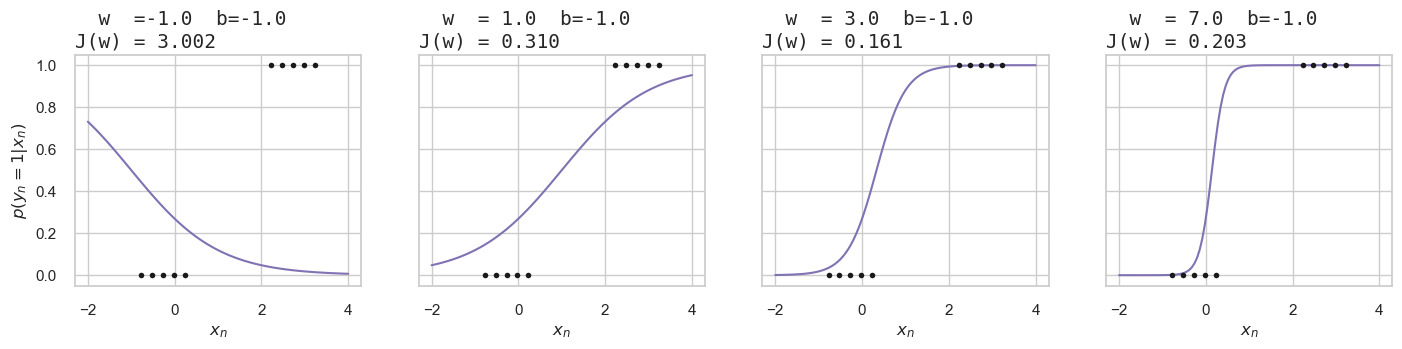

In [30]:
w_candidates_A = [-1., 1, 3, 7]

A = len(w_candidates_A)
fig, axgrid = plt.subplots(nrows=1, ncols=A, figsize=(4*A+1,3), sharex=True, sharey=True)

L = 101
xdense_L = np.linspace(-2, 4, L)
xdense_L1 = xdense_L[:,np.newaxis]

tmplr = LogisticRegressionGradientDescent(C=1000.0)

for aa in range(len(w_candidates_A)):
    curw = w_candidates_A[aa]
    
    # Hard-code the values of wtil_G so they reflect current w value
    tmplr.wtil_G = np.asarray([curw, fixedb]);
    
    # Evaluate phat with current wtil_G, across L different dense x values
    phat_L = tmplr.predict_proba(xdense_L1)[:,1]

    # Show predicted phat probability alongside true labels
    axgrid[aa].plot(xdense_L, phat_L, 'm-');
    axgrid[aa].plot(x_NF[:,0], y_N, 'k.', markersize=8);
    
    # Make pretty title to help with debugging
    curJ = tmplr.calc_loss(tmplr.wtil_G, xone_NG, y_N)
    panel = axgrid[aa]
    panel.set_title('  w  =% .1f  b=%.1f\nJ(w) = %.3f ' % (curw, fixedb, curJ),
                         x=0.0,
                         font='monospace', fontsize=14,
                         horizontalalignment='left')
    panel.set_xticks([-2, 0, 2, 4]);
    panel.set_xlabel(r'$x_n$')
    if aa == 0:
        panel.set_ylabel(r'$p(y_n=1 | x_n)$');

## Step 1A: Evaluate loss and grad across dense grid of w values

This prepares for Fig 1a

In [31]:
fixedb = -1.0 # Fix bias coef

In [32]:
xone_NG = insert_final_col_of_all_ones(x_NF)
G = xone_NG.shape[1]

In [33]:
mylr = LogisticRegressionGradientDescent(C=10)

In [34]:
## Perform numerical search over a fine grid of w values
H = 201 # num grid points
w_grid_H = np.linspace(-2, 11, H)
loss_grid_H = np.zeros_like(w_grid_H)
grad_grid_H = np.zeros_like(w_grid_H)

for hh in range(H):
    wtil_G = np.asarray([w_grid_H[hh], fixedb])
    loss = mylr.calc_loss(wtil_G, xone_NG, y_N) # TODO fixme, call calc_loss
    grad_G = mylr.calc_grad(wtil_G, xone_NG, y_N) # TODO fixme calc_grad
    loss_grid_H[hh] = loss
    grad_grid_H[hh] = grad_G[0]


## Figure 1a: Loss and Grad vs w

If your calc_loss and calc_grad implementations are correct, you shouldn't need to edit anything in this block

This block helps visualize loss J and its grad as a function of w

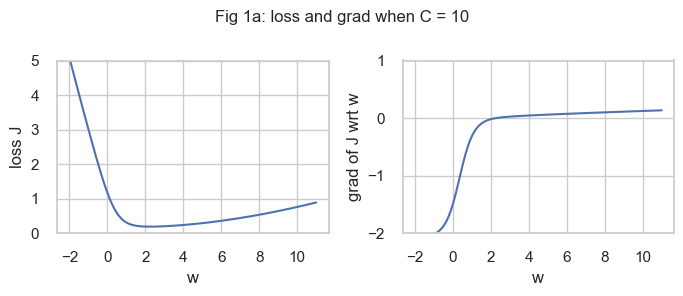

In [35]:
fig, axgrid = plt.subplots(nrows=1, ncols=2, figsize=(7,3), sharex=True, sharey=False)

loss_panel = axgrid[0]
loss_panel.plot(w_grid_H, loss_grid_H, 'b-');
loss_panel.set_ylim([0.0, 5.0]);
loss_panel.set_xticks([-2, 0, 2, 4, 6, 8, 10]);
loss_panel.set_xlabel('w')
loss_panel.set_ylabel('loss J')

grad_panel = axgrid[1]
grad_panel.plot(w_grid_H, grad_grid_H, 'b-');
grad_panel.set_ylim([-2, 1]);
grad_panel.set_yticks([-2, -1, 0, 1]);
grad_panel.set_xlabel('w')
grad_panel.set_ylabel('grad of J wrt w')

plt.suptitle("Fig 1a: loss and grad when C = %.3g" % mylr.C, fontsize=12);

plt.tight_layout();

## Caption of Fig 1a: Part 1

Write in report. See instructions.

## Caption of Fig 1a: Part 2

TODO find the values in w_grid_H that correspond to lowest loss value in loss_grid_H 

Make sure the answer here gets moved to your report

In [36]:
# TODO write code to find a much tighter interval
loss_grid_H=list(loss_grid_H)
min_w=w_grid_H[loss_grid_H.index(min(loss_grid_H))]
print("Lowest value is between %.1f and %.1f" % (round(min_w,1)-0.1, round(min_w,1))) # TODO fixme

Lowest value is between 2.2 and 2.3


## Step 1B

Using this toy data, `init_w_recipe='zeros'` and call `fit` with an appropriate step size to run gradient descent. Be sure to verify convergence. If it doesn't converge, adjust your step size accordingly. 


In [37]:
mylr_fromzeros = LogisticRegressionGradientDescent(
    C=50., init_recipe='zeros',num_iterations = 999,step_size =10) # TODO fixme: adjust step_size as needed
mylr_fromzeros.fit(x_NF,y_N) # TODO call fit on provided train data in x_NF and y_N

Initializing G=2 parameters in wtil_G via recipe: zeros
Running GD for up to 999 iters with step_size 10
iter   0/999  loss   1.000000  avg_abs_grad   0.541011  w   0.000 b   0.000
iter   1/999  loss   0.580973  avg_abs_grad   0.127100  w  10.820 b   0.000
iter   2/999  loss   0.247357  avg_abs_grad   0.068873  w  10.333 b  -2.055
iter   3/999  loss   0.160535  avg_abs_grad   0.041190  w   9.940 b  -3.040
iter   4/999  loss   0.129990  avg_abs_grad   0.029723  w   9.638 b  -3.561
iter   5/999  loss   0.113977  avg_abs_grad   0.023902  w   9.378 b  -3.896
iter   6/999  loss   0.103420  avg_abs_grad   0.020399  w   9.142 b  -4.138
iter   7/999  loss   0.095519  avg_abs_grad   0.018044  w   8.922 b  -4.326
iter   8/999  loss   0.089143  avg_abs_grad   0.016338  w   8.714 b  -4.478
iter   9/999  loss   0.083745  avg_abs_grad   0.015033  w   8.514 b  -4.606
iter  10/999  loss   0.079030  avg_abs_grad   0.013993  w   8.323 b  -4.715
iter  11/999  loss   0.074821  avg_abs_grad   0.013139  w  

## Step 1B part two: trace plotting

Edit the function below to make sure you are plotting the history of your gradient descent run. 

Only lines marked TODO need to be edited.

Please don't mess with the styling or ylims if at all possible.
If you find yourself messing with those, it may indicate a bug.

In [38]:
def extract(list):
    w = []
    b = []
    for i in list:
        w.append(i[0])
        b.append(i[-1])
    return w,b
def make_trace_plots(mylr, figsize=(11,3),
                    loss_ylims=[-0.01, 0.2],
                    grad_ylims=[-0.01, 0.2],
                    param_ylims=[-10, 12],
                    xtick_every=100,
                    ):
    fig, axgrid = plt.subplots(
        nrows=1, ncols=3, figsize=figsize, sharex=True, sharey=False);
    loss_panel = axgrid[0]
    grad_panel = axgrid[1]
    param_panel = axgrid[2]
    try:
        xmax = np.max(mylr.trace_steps)
    except AttributeError:
        xmax = 100
    
    # Plot loss as function of iteration
    loss_panel.plot(mylr.trace_loss); # TODO fixme, use trace_* attributes of mylr
    loss_panel.set_ylim(loss_ylims);
    loss_panel.set_xlabel('iter');
    loss_panel.set_ylabel('loss J');
    loss_panel.set_xticks(np.arange(0, xmax, xtick_every));
    
    # Plot L1 norm of grad as function of iteration
    grad_panel.plot(mylr.trace_grad_L1_norm); # TODO fixme, use trace_* attributes of mylr
    grad_panel.set_ylim(grad_ylims);
    grad_panel.set_xlabel('iter');
    grad_panel.set_ylabel('sum(abs(grad_G))')
    
    # Plot parameter values as function of iteration
    
    w_list,b_list = extract(mylr.trace_param)     # TODO fixme      
    
    step_list = np.linspace(1,len(w_list),len(w_list))# TODO fixme
    param_panel.plot(step_list, w_list, 'b', label='w')
    param_panel.plot(step_list, b_list, 'r', label='b')    
    param_panel.legend(loc='upper right');
    param_panel.set_xlabel('iter');
    param_panel.set_ylim(param_ylims);
    param_panel.set_ylabel('param. val.')
    
    plt.tight_layout();

## Figure 1b: Trace plots for from-zeros run

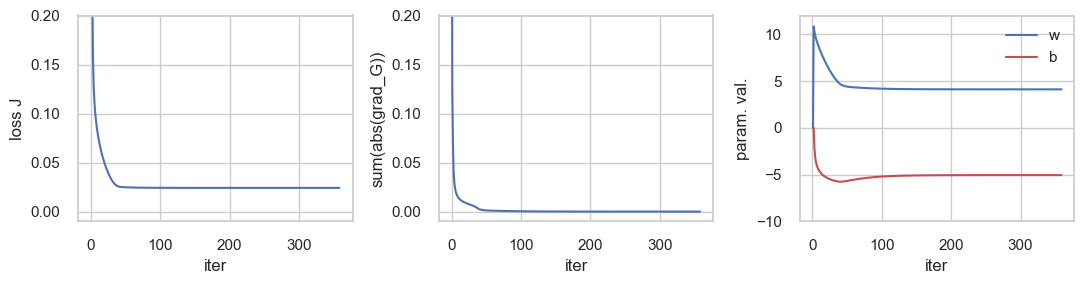

In [39]:
make_trace_plots(mylr_fromzeros)

TODO in your report: **In a brief caption**, indicate the `step_size` used and why you picked that value.


FYI as a bonus exercise for your own understanding, you could try calling fit using a different initialization (random), and compare the trace plots of that call to the ones above.

## Step 1C: Verify your implementation matches sklearn

Setup numpy so we print out arrays nicely to only 3 decimal places

In [40]:
def pprint_float(fval):
    return '% .3f' % fval

pretty_formatter = {'float': pprint_float}
np.set_printoptions(formatter=pretty_formatter)


In [41]:
import sklearn.metrics
from sklearn.linear_model import LogisticRegression

row_list = list()

for C in [500.0, 5.0, 0.005]:
    sklr = LogisticRegression(C=C, max_iter=999, solver='lbfgs', random_state=0)
    # TODO call fit
    sklr.fit(x_NF,y_N)
    # TODO unpack learned weights from coef_ 
    w=sklr.coef_.flatten()
    b=sklr.intercept_
    # TODO unpack learned bias coef from intercept_
    sklr_wtil_G = np.concatenate([w, b]) # TODO fixme
    y_proba_sk = sklr.predict_proba(x_NF)[:, 1]
    sklr_loss = sklearn.metrics.log_loss(y_N, y_proba_sk)     # TODO fixme
    
    # Stash these sklearn values so we can later build sklearn rows of Table 1c
    row_dict = {'C':C, 'method':'sklearn',
                'wtil_G':str(sklr_wtil_G),
                'loss':sklr_loss,
                'solver_status':'',
               }
    row_list.append(row_dict)    
    
    step_size = 0.26*C # TODO fixme, might need to be customized for each C
    if C == 0.005:step_size = 0.05
    mylr = LogisticRegressionGradientDescent(
        C=C, 
        step_size=step_size,
        use_base2_for_BCE=False, # Using base-e ensures we match sklearn exactly
        num_iterations=999,
        verbose=False,           # You may set verbose=True to better adjust step_size
        )
    mylr.fit(x_NF, y_N)
    mylr_wtil_G = mylr.trace_param[-1] # TODO fixme
    mylr_loss = mylr.calc_loss(mylr_wtil_G, xone_NG, y_N)           # TODO fixme

    # Stash these values so we can later build 'my code' rows of Table 1c
    row_dict = {'C':C, 'method':'my code',
                'wtil_G':str(mylr_wtil_G),
                'loss':mylr_loss,
                'solver_status':mylr.solver_status,
               }
    row_list.append(row_dict)
    
    print("C = % 9.3f" % C)
    print(mylr.solver_status)
    # TODO remember, we want to converge within 999 iters.
    # If you are not converging, please adjust step_size

C =   500.000
Done. Converged after 526 iters with step_size 130
C =     5.000
Done. Converged after 380 iters with step_size 1.3
C =     0.005
Done. Converged after 380 iters with step_size 0.05


## Table 1c

In [42]:
# Convert the rows assembed above into a pandas DataFrame
df = pd.DataFrame(row_list)

Pretty print the pandas data frame as an HTML table.
You can copy this into your report.

In [43]:
pd.set_option('display.max_colwidth', 200)
from IPython.core.display import HTML
HTML(df.to_html(index=False))

C,method,wtil_G,loss,solver_status
500.000,sklearn,[ 5.556 -6.832],0.001027,
500.000,my code,[ 5.555 -6.832],0.004114,Done. Converged after 526 iters with step_size 130
5.000,sklearn,[ 2.360 -2.903],0.038924,
5.000,my code,[ 2.360 -2.903],0.094630,Done. Converged after 380 iters with step_size 1.3
0.005,sklearn,[ 0.036 -0.045],0.666226,
0.005,my code,[ 0.036 -0.044],0.679490,Done. Converged after 380 iters with step_size 0.05


If needed, here's a plain text version of the table you could also include in your report.

In [44]:
print(df.to_string(index=False))

      C  method          wtil_G     loss                                       solver_status
500.000 sklearn [ 5.556 -6.832] 0.001027                                                    
500.000 my code [ 5.555 -6.832] 0.004114  Done. Converged after 526 iters with step_size 130
  5.000 sklearn [ 2.360 -2.903] 0.038924                                                    
  5.000 my code [ 2.360 -2.903] 0.094630  Done. Converged after 380 iters with step_size 1.3
  0.005 sklearn [ 0.036 -0.045] 0.666226                                                    
  0.005 my code [ 0.036 -0.044] 0.679490 Done. Converged after 380 iters with step_size 0.05


### Short answer 1d

See instructions on webpage. Write answer in your report